In [1]:
%matplotlib inline

In [2]:
import sys
import os
import scirpy as ir
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib import pyplot as plt

/home/ye/anaconda3/envs/scanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
sc.logging.print_versions()

scanpy==1.4.6 anndata==0.7.1 umap==0.4.3 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.8.2 louvain==0.7.0


/home/ye/anaconda3/envs/scanpy/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


### Loading data

In [6]:
adata=sc.read_h5ad("data/aging-11-tCR/adata.h5ad")
adata.obs.head()

,orig_cluster,km_cluster,idents,multi_chain,TRA_1_cdr3,TRA_2_cdr3,TRB_1_cdr3,TRB_2_cdr3,TRA_1_junction_ins,TRA_2_junction_ins,...,TRB_1_cdr3_nt,TRB_2_cdr3_nt,has_tcr,chain_pairing,n_counts,doublet_scores_obs,predicted_doublets,doublet_errors_obs,leiden,louvain
AAACCTGAGAGCTTCT-1,1,4,1,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nan,No TCR,353.0,0.014182,False,0.006041,18,19
AAACCTGAGATGTCGG-1,1,4,1,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nan,No TCR,613.0,0.071636,False,0.028883,4,3
AAACCTGAGCATGGCA-1,6,5,1,False,CAVYGATNKLIF,None,CASSPSYGELFF,None,None,None,...,TGTGCCAGCAGCCCAAGCTACGGGGAGCTGTTTTTT,None,True,Single pair,3715.0,0.015544,False,0.006608,2,2
AAACCTGAGCGTAGTG-1,2,1,1,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nan,No TCR,989.0,0.028839,False,0.012076,14,15
AAACCTGAGCTGATAA-1,6,5,1,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,nan,No TCR,3600.0,0.011938,False,0.005104,2,2


### Preprocess Transcriptomics data

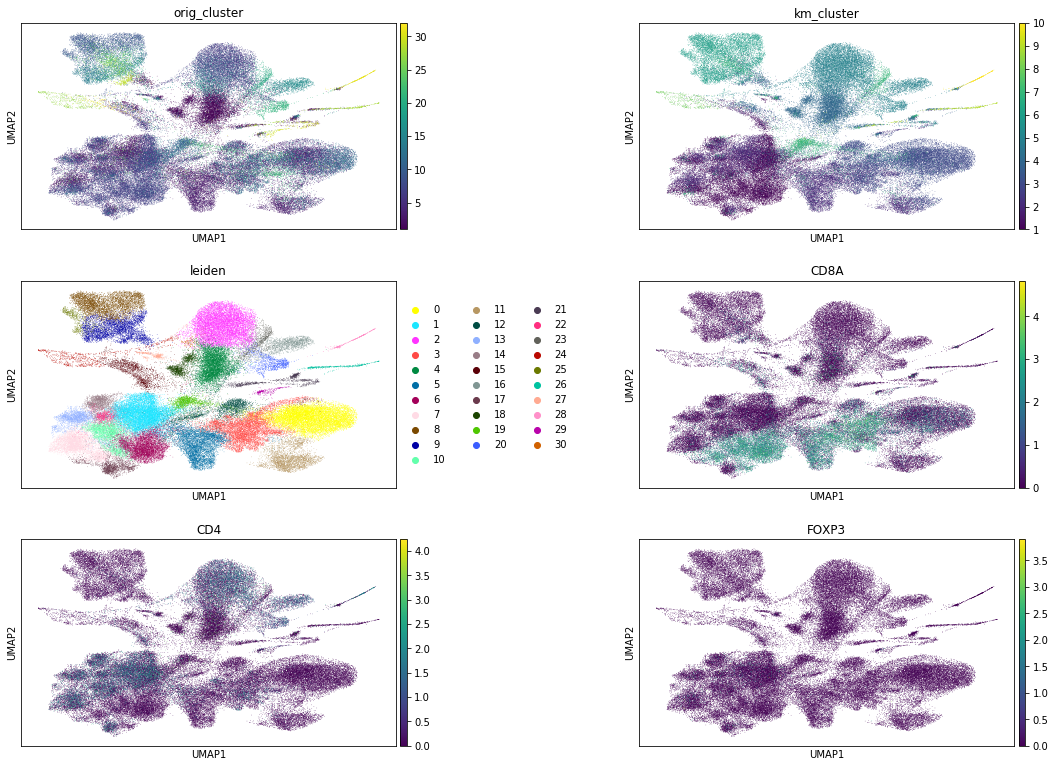

In [9]:
sc.pl.umap(adata, color=["orig_cluster", "km_cluster","leiden", "CD8A", "CD4", "FOXP3"], ncols=2, wspace=.5)

### TCR Quality Control

In [10]:
ir.tl.chain_pairing(adata)

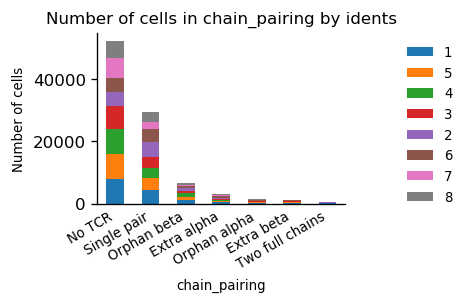

In [11]:
ir.pl.group_abundance(
    adata, groupby="chain_pairing", target_col="idents",
)

... storing 'chain_pairing' as categorical


Fraction of cells with more than one pair of TCRs: 0.05


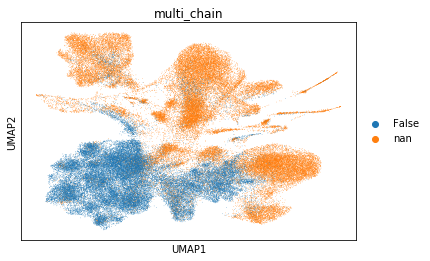

In [13]:
print("Fraction of cells with more than one pair of TCRs: {:.2f}".format(
    np.sum(adata.obs["chain_pairing"].isin(["Extra beta", "Extra alpha", "Two full chains"])) / adata.n_obs
))
sc.pl.umap(adata, color="multi_chain")

In [18]:
#adata = adata[adata.obs["multi_chain"] != "True", :].copy()

### Define clonotypes

In [ ]:
ir.pp.tcr_neighbors(adata, cutoff=10, receptor_arms="all", dual_tcr="all")
ir.tl.define_clonotypes(adata, partitions="connected")

 43%|████▎     | 12499/29271 [06:17<06:15, 44.71it/s]

... storing 'clonotype' as categorical


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f819b35d0>],
      dtype=object)

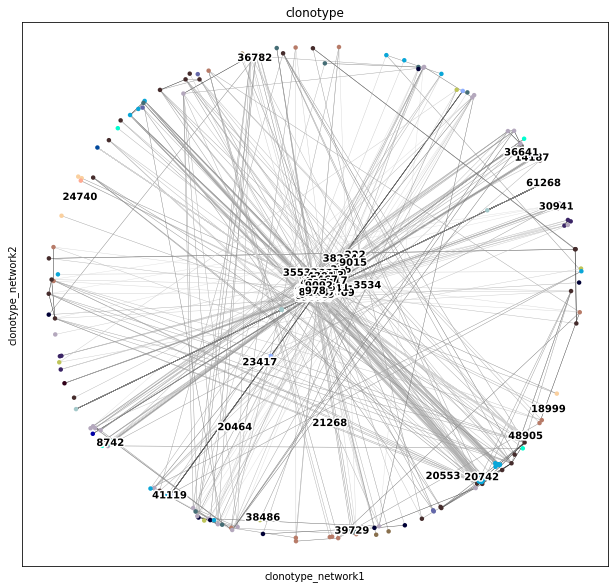

In [22]:
ir.tl.clonotype_network(adata, min_size=4)
ir.pl.clonotype_network(adata, color="clonotype", legend_fontoutline=3, size=80)

### Clonal analysis
#### Clonal expansion

In [23]:
ir.tl.clonal_expansion(adata)

... storing 'clonal_expansion' as categorical


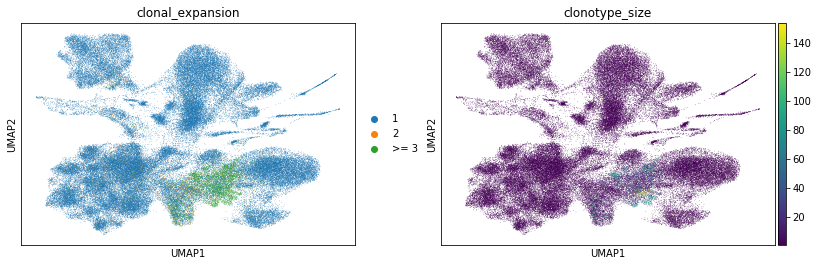

In [24]:
sc.pl.umap(adata, color=["clonal_expansion", "clonotype_size"])

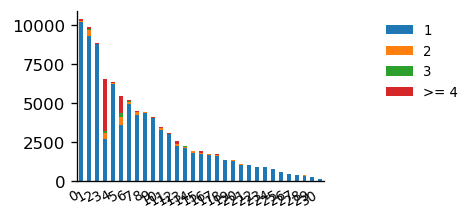

In [27]:
ir.pl.clonal_expansion(adata, groupby="leiden", clip_at=4, normalize=False)

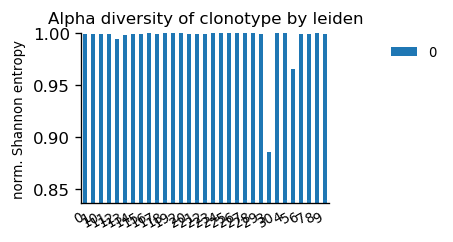

In [28]:
ax = ir.pl.alpha_diversity(adata, groupby="leiden")

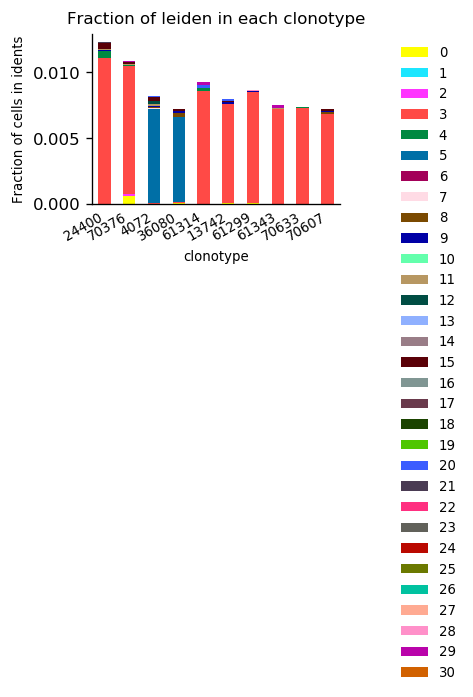

In [29]:
ir.pl.group_abundance(
    adata, groupby="clonotype", target_col="leiden", max_cols=10, fraction="idents"
)

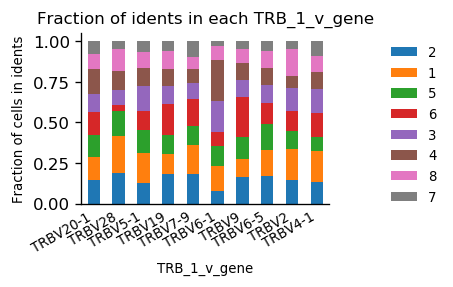

In [30]:
ir.pl.group_abundance(
    adata,
    groupby="TRB_1_v_gene",
    target_col="idents",
    fraction=True,
    max_cols=10
)

TypeError: sequence item 0: expected str instance, float found

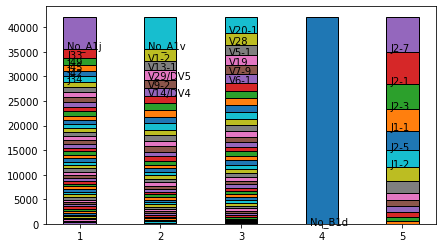

In [31]:
ir.pl.vdj_usage(adata, full_combination=False, top_n=30)

In [33]:
ir.pl.vdj_usage?

### Spectratype plots

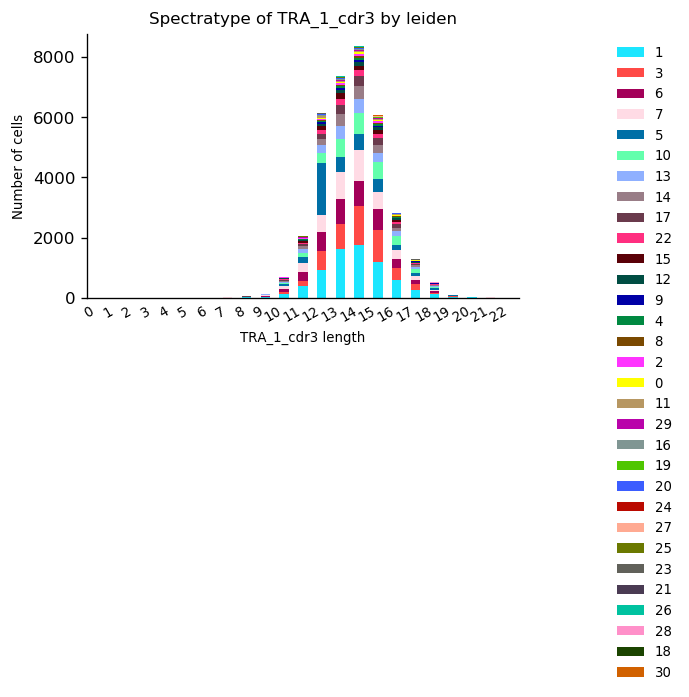

In [35]:
ir.pl.spectratype(adata, target_col="leiden", viztype="bar", fig_kws={"dpi": 120})

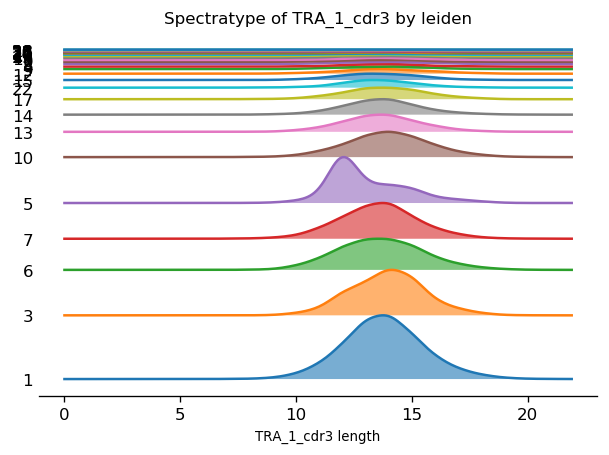

In [39]:
ir.pl.spectratype(
    adata,
    target_col="leiden",
    viztype="curve",
    fig_kws={"dpi": 120},
    kde_kws={'curve_layout': 'shifted', 'kde_norm': False, 'kde_norm': False}
)

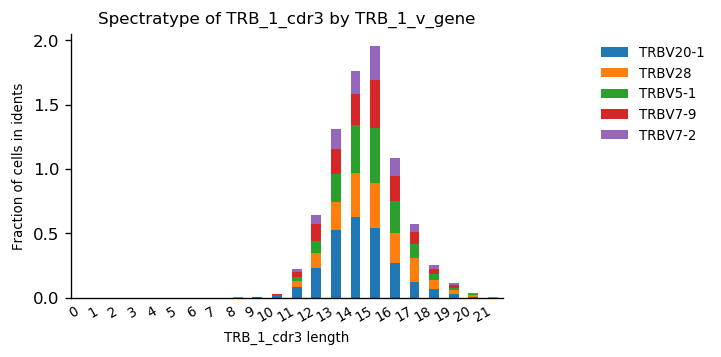

In [40]:
ir.pl.spectratype(
    adata[adata.obs["TRB_1_v_gene"].isin(["TRBV20-1", "TRBV7-2", "TRBV28", "TRBV5-1", "TRBV7-9"]),:],
    groupby="TRB_1_cdr3",
    target_col="TRB_1_v_gene",
    fraction="idents",
    fig_kws={'dpi': 120}
)

In [41]:
df, dst, lk = ir.tl.repertoire_overlap(adata, 'idents', inplace=False)

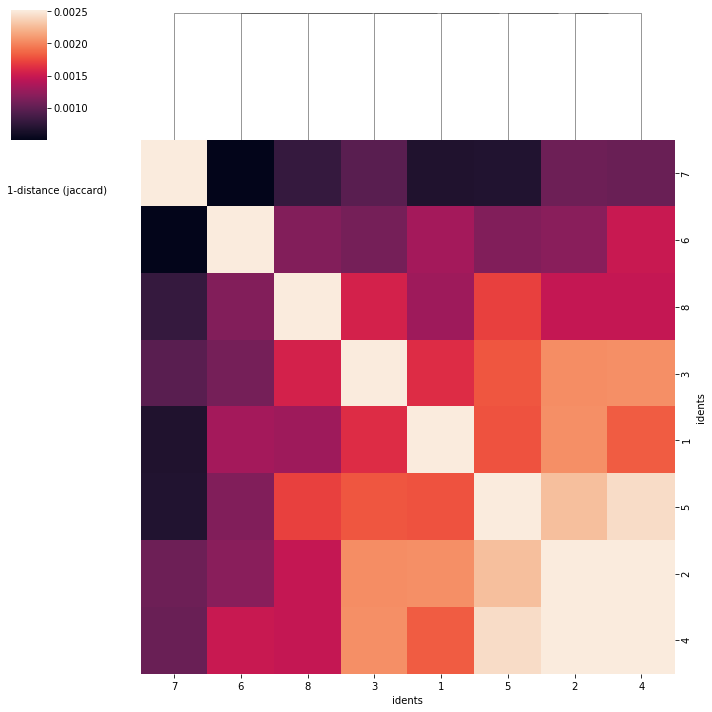

In [42]:
ir.pl.repertoire_overlap(adata, 'idents')

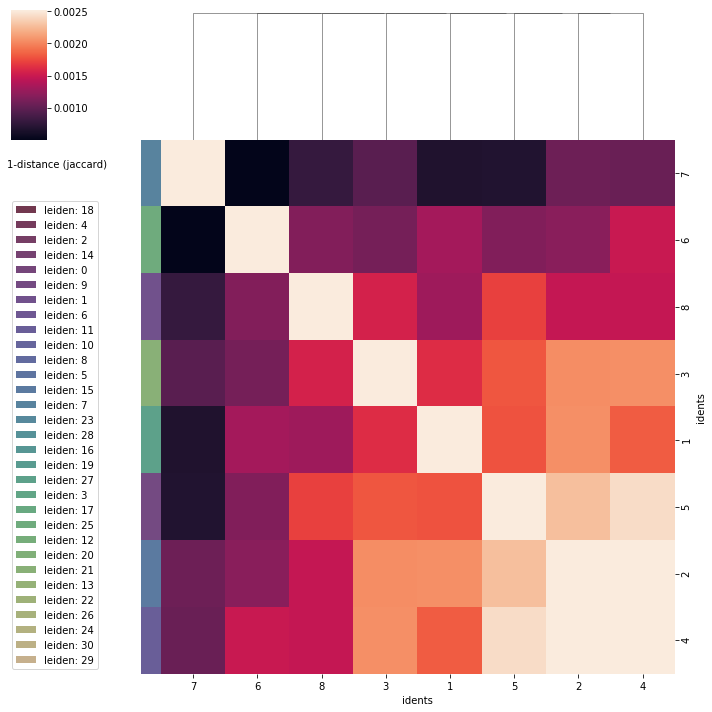

In [50]:
ir.pl.repertoire_overlap(adata, 'idents', heatmap_cats=['leiden'])

No handles with labels found to put in legend.


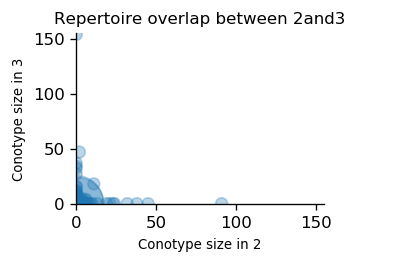

In [51]:
ir.pl.repertoire_overlap(adata, 'idents', pair_to_plot=['2', '3'])

In [48]:
#import pickle
#with open("./data/aging-11-tCR/adata_addtcr.pkl","wb") as file:
#    pickle.dump(adata,file)

In [52]:
#with open("./data/aging-11-tCR/adata_addtcr.pkl","rb") as file:
#    adata=pickle.load(file)